 # 6. Groups

In [170]:
from sympy import (
    Eq,
    init_printing
)
from sympy import PermutationMatrix
from sympy.categories import (
    Diagram,
    NamedMorphism,
    Object,
    xypic_draw_diagram
)
from sympy.combinatorics import free_group
from sympy.combinatorics.fp_groups import FpGroup
from sympy.combinatorics.group_constructs import DirectProduct
from sympy.combinatorics.homomorphisms import (
    group_isomorphism,
    homomorphism
)
from sympy.combinatorics.named_groups import (
    AlternatingGroup,
    PermutationGroup,
    SymmetricGroup
)

init_printing(perm_cyclic = False)

In [171]:
G, g = free_group('g')
G

In [172]:
G._generators()

(g,)

In [173]:
G.rank

In [174]:
G.identity

<identity>

In [175]:
G.is_associative

True

In [176]:
G.order()

In [177]:
G.is_abelian

True

In [178]:
print(g)

g


In [179]:
print(g.inverse())

g**-1


In [180]:
h = g.copy()
x = g.copy()

h*(g*x) == (h*g)*x

True

In [181]:
Q, a, b = free_group('a b')
Q8 = FpGroup(Q, [a**4, b**2*a**-2, b*a*b**-1*a])
Q8

In [182]:
Q8.order()

In [183]:
Q8.is_abelian

False

In [184]:
Q8.is_nilpotent

True

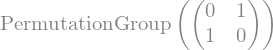

In [185]:
C, a = free_group('a')
C2 = FpGroup(C, [a**2])
C2, iC2 = C2._to_perm_group()
C2

In [186]:
C2.order()

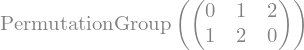

In [187]:
C3 = FpGroup(C, [a**3])
C3, iC3 = C3._to_perm_group()
C3

In [188]:
C3.order()

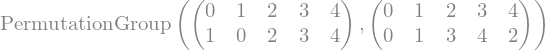

In [189]:
C6 = DirectProduct(C2, C3)
C6

In [190]:
C6.order()

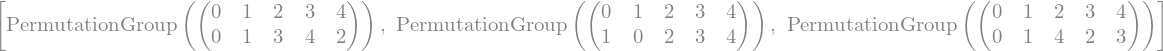

In [191]:
C6_sbg = [
    C6.subgroup([e]) for e in list(C6.elements)
    if e.order() > 1 and e.order() < C6.order()
]
C6_sbg

In [192]:
C6_sbg_1, C6_sbg_2, C6_sbg_3 = C6_sbg
C6_sbg_1.order()

In [193]:
C6_sbg_3.order()

In [194]:
C_inf = FpGroup(C, [])
C_inf.order()

In [195]:
G, g = free_group('g')
G = FpGroup(G, [g**6])

H, h = free_group('h')
H = FpGroup(H, [h**3])

t = homomorphism(G, H, G.generators, H.generators)
t.is_surjective()

True

In [196]:
t.is_injective()

False

In [197]:
t.is_isomorphism()

False

In [198]:
t.kernel()

In [199]:
t.domain

In [200]:
t.codomain

In [201]:
t.image()

In [202]:
[e for e in G.elements]

[<identity>, g, g**-1, g**2, g**4, g**3]

In [203]:
[t._apply(e) for e in G.elements]

[<identity>, h, h**-1, h**2, h**4, h**3]

In [204]:
g1, g2 = G.elements[3:5]

t._apply(g1*g2) == t._apply(g1)*t._apply(g2)

True

In [205]:
t._apply(g**-1) == t._apply(g)**-1

True

In [206]:
t._apply(G.identity) == H.identity

True

In [207]:
S = G.subgroup([g**3])
S.order()

In [208]:
S.elements

[<identity>, g_1]

In [209]:
inclusion = homomorphism(S, G, S.generators, [g**3])
inclusion.is_surjective()

False

In [210]:
inclusion.is_injective()

True

In [211]:
inclusion.is_isomorphism()

False

In [212]:
inclusion.kernel()

In [213]:
inclusion.domain

In [214]:
inclusion.codomain

In [215]:
check, iso = group_isomorphism(G, G)
check

True

In [216]:
def is_bijection(morphism):
    """ Check for a bijection. """ 
    return morphism.is_surjective() and morphism.is_injective()

is_bijection(iso)

True

In [217]:
Qfree, q1, q2 = free_group('q1 q2')
Q = FpGroup(Qfree, [q1**4, q2**2, q2*q1*q2*q1**1])
Q.order()

In [218]:
Q_diag_eq = [
    t for t in Q.elements
    if len(t.letter_form_elm) % 2 == 0
]
Q_diag_eq

[<identity>, q1**2, q1*q2, q2*q1]

In [219]:
Q_diag_ineq = [
    t for t in Q.elements
    if len(t.letter_form_elm) % 2 == 1
]
Q_diag_ineq

[q1, q1**-1, q2, q1**2*q2]

In [220]:
S2a = FpGroup(Qfree, Q_diag_eq)
S2a.order()

In [221]:
Q_S2a = homomorphism(Q, S2a, Q.generators, S2a.generators)
Q_S2a.is_surjective()

True

In [222]:
Q_turn_eq = [
    t for t in Q.elements
    if q2 not in t.letter_form_elm
]
Q_turn_eq

[<identity>, q1, q1**-1, q1**2]

In [223]:
Q_turn_ineq = [
    t for t in Q.elements
    if q2 in t.letter_form_elm
]
Q_turn_ineq

[q2, q1*q2, q2*q1, q1**2*q2]

In [224]:
S2b = FpGroup(Qfree, [Q_turn_ineq[1], Q_turn_ineq[0]**2])
S2b.order()

In [225]:
Q_S2b = homomorphism(Q, S2b, Q.generators, S2b.generators)
Q_S2b.is_surjective()

True

In [226]:
S3_free, a, b = free_group("a b")
S3 = FpGroup(S3_free, [a**3, b**2, b*a*b*a])
S3.order()

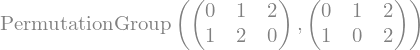

In [227]:
S3_subs = [S3.subgroup([x]) for x in S3.generators]
s31_perm = S3_subs[0]._to_perm_group()[0][0]
s32_perm = S3_subs[1]._to_perm_group()[0][0]

S3_pg = PermutationGroup(s31_perm, s32_perm, degree=3)
S3_pg

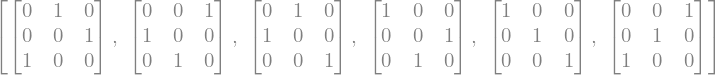

In [228]:
S3_repr = [PermutationMatrix(pm).as_explicit() for pm in list(S3_pg.elements)]
S3_repr

In [229]:
def conjugation_by_k(G, k):
    """ k is the index of the element. """
    els = G.elements
    k = els[k]
    return [G.reduce(k*g*k**-1) for g in els]

S3_cons = [conjugation_by_k(S3, k) for k in range(len(S3.elements))]
S3_cons

[[<identity>, a, a**-1, b**-1, a*b**-1, a**-1*b**-1],
 [<identity>, a, a**-1, a**-1*b**-1, b**-1, a*b**-1],
 [<identity>, a, a**-1, a*b**-1, a**-1*b**-1, b**-1],
 [<identity>, a**-1, a, b**-1, a**-1*b**-1, a*b**-1],
 [<identity>, a**-1, a, a**-1*b**-1, a*b**-1, b**-1],
 [<identity>, a**-1, a, a*b**-1, b**-1, a**-1*b**-1]]

In [230]:
def is_automorphism(iso):
    return iso.is_isomorphism() and is_bijection(iso)

inner_automorphisms = [
    S3.subgroup(x, homomorphism=True)
    for x in S3_cons
]

all([is_automorphism(k[1]) for k in inner_automorphisms])

True

In [231]:
correspondences = [
    homomorphism(
        S3.subgroup([S3.elements[k]]),
        inner_automorphisms[k][0],
        S3.subgroup([S3.elements[k]]).generators
    )
    for k in range(len(S3.elements))
]

all([k.is_trivial() for k in correspondences])

True

In [232]:
S3_presentation = S3_pg.presentation()
a, b = S3_presentation.generators
N = S3_presentation.subgroup([a])
N._perm_property("is_subgroup")(S3_pg)

True

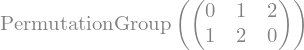

In [233]:
N._to_perm_group()[0]

In [234]:
N._perm_property("is_normal")(S3_pg)

True

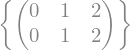

In [235]:
t = homomorphism(
    S3_presentation,
    N._to_perm_group()[0],
    [a]
)

t.image().elements

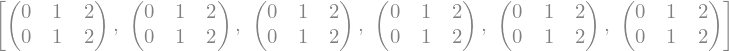

In [236]:
[t(g) for g in list(S3_presentation.elements)]

In [237]:
# There are no non-trivial homomorphisms from S3 to C3
all([t(g).is_identity for g in list(S3_presentation.elements)])

True

In [238]:
t_kern = t.kernel()
t_kern_fp = t_kern.parent.subgroup(t_kern.generators, t_kern.C)
t_kern_fp.elements

[<identity>, x_0_0, x_0_0**-1, x_1_0, x_0_0*x_1_0, x_1_0*x_0_0]

 > **Theorem**. For any normal subgroup N of G there is a group H and an epimorphism $t: G \rightarrow H$ with kernel exactly N. If $s: G \rightarrow L$ is any group homomorphism with kernel containing N, there is a unique homomorphism $s': H \rightarrow L$ with composite $s' \cdot t = s$ . . .

In [239]:
G = Object("G")
H = Object("H")
L = Object("L")

t = NamedMorphism(G, H, "t")
s_p = NamedMorphism(H, L, "s`")

s = s_p * t
s

In [240]:
d = Diagram([t, s_p, s])
d

In [241]:
xypic_draw_diagram(d)

'\\xymatrix{\nG \\ar[r]^{t} & H \\ar[d]^{s`} \\\\\n& L \n}\n'

In [242]:
S3_ct = S3_presentation.coset_enumeration([a])
S3_ct

In [243]:
S3_ct.table

In [244]:
cosets = [
    set([S3_presentation.reduce(g*n) for g in S3_presentation.elements])
    for n in [a, a**2, a**3]
]
cosets

[{<identity>, x_0**-1, x_0, x_1**-1, x_0**-1*x_1**-1, x_0*x_1**-1},
 {<identity>, x_0**-1, x_0, x_1**-1, x_0**-1*x_1**-1, x_0*x_1**-1},
 {<identity>, x_0**-1, x_0, x_1**-1, x_0**-1*x_1**-1, x_0*x_1**-1}]

In [245]:
all(x == cosets[0] for x in cosets)

True

In [246]:
S4 = SymmetricGroup(4)
A4 = AlternatingGroup(4)
A4.is_normal(S4)

True

In [247]:
S4.order() / A4.order()